# Problem statement: 

Dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing, use bank_full.csv


In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn import * 

In [3]:
df = pd.read_csv("/data/bank-full.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
target = "y"

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


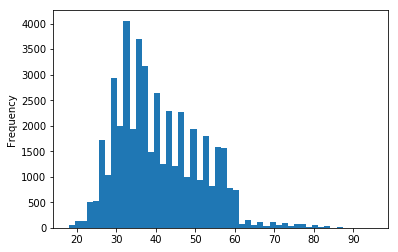

In [7]:
df.age.plot.hist(bins = 50)

In [8]:
df["age_group"] = np.where(df.age > 60, "Senior", "Non-senior")

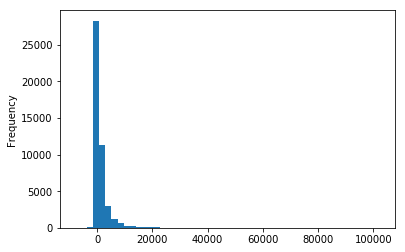

In [9]:
df.balance.plot.hist(bins = 50)

In [10]:
idx = df[df.balance <= 0].index
df["blacklist"] = "No"
df.loc[idx, "balance"] = 0.1
df.loc[idx, "blacklist"] = "Yes" 

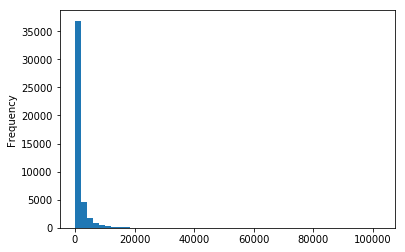

In [11]:
df.balance.plot.hist(bins = 50)

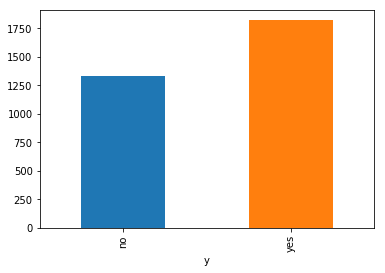

In [12]:
df.groupby("y").balance.mean().plot.bar()

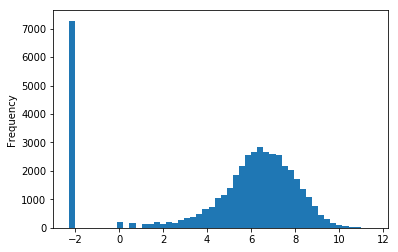

In [13]:
pd.Series(np.log(df.balance)).plot.hist(bins = 50)

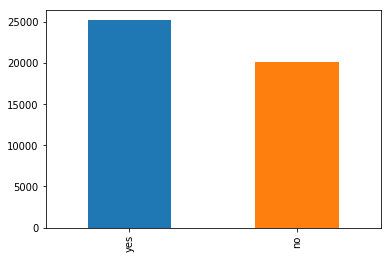

In [14]:
df.housing.value_counts().plot.bar()

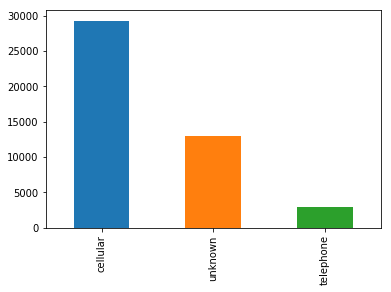

In [15]:
df.contact.value_counts().plot.bar()

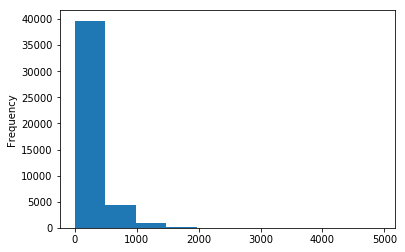

In [16]:
df.duration.plot.hist()

In [17]:
df["duration_long"] = np.where(df.duration > 60, "high", "normal")

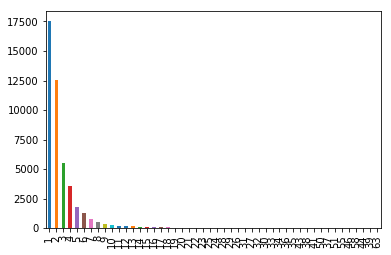

In [18]:
df.campaign.value_counts().plot.bar()

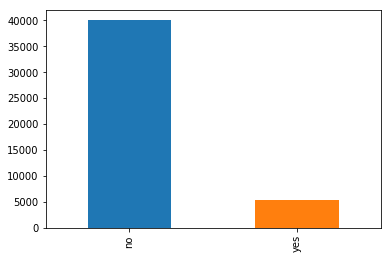

In [19]:
df[target].value_counts().plot.bar()

In [25]:
pd.Series(y_train).value_counts() / X_train.shape[0]

0    0.881885
1    0.118115
dtype: float64

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,blacklist,duration_long
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Non-senior,No,high
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Non-senior,No,high
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Non-senior,No,high
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Non-senior,No,high
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no,Non-senior,No,high


Accuracy: 0.90002948982601


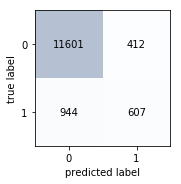

In [45]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df[target])
X = df.copy()
del X[target]

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth = 4))
])

pipe.fit(X_train, y_train)

y_test_pred = pipe.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred));

In [46]:
est = pipe.steps[1][1]
est

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
from sklearn.tree import export_graphviz

In [48]:
export_graphviz(est, out_file = "tree.dot", feature_names = X.columns)

In [49]:
!dot -Tpng tree.dot -o tree.png

Text(0,0.5,'TPR')

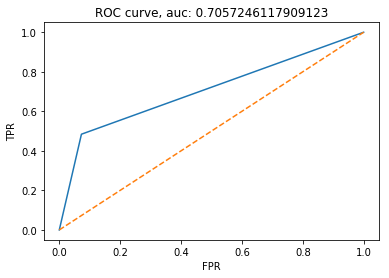

In [26]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
auc = metrics.auc(fpr, tpr)
plt.title("ROC curve, auc: " + str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")

In [50]:
param_grid = {
    "est__max_depth": np.arange(2, 10) 
}

grid = model_selection.GridSearchCV(pipe, param_grid, cv = 5,                           
        verbose = True, scoring = "accuracy")
grid.fit(X_train, y_train)
auc = metrics.accuracy_score(y_test, 
                grid.best_estimator_.predict(X_test))
print("Accuracy score for testing dataset", auc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    7.6s finished


Accuracy score for testing dataset 0.9023149513417871


In [51]:
grid.best_params_

{'est__max_depth': 7}